# Question 4

In [2]:
import numpy as np 
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("regressionprob1_train0.csv")
print(df.head())

   A         B         C         D           F
0  1  3.718943  3.835133  9.662825   93.886859
1  2  0.268707  0.137590  7.481035   79.935159
2  3  9.520922  3.114357  8.226973  102.293084
3  4  1.737736  2.890177  8.017622   79.688891
4  5  3.102865  7.290815  5.851053   41.624044


In [4]:
x = df.iloc[:,0:4].values # features
y = df['F'].values # targets

ones_ = np.ones(len(y), float)
A = np.column_stack((ones_, x)) # Compact notation

# Part A

In [5]:
weights = np.linalg.inv(A.T @ A) @ A.T @ y
print(f"Intercept: {weights[0]}, Weights: {weights[1:]}")

Intercept: 0.07249080791577711, Weights: [ 2.04773925  3.16044263 -5.09550919 10.20993353]


In [6]:
predictions = A @ weights
print(predictions.shape)
print(predictions)

(30,)
[ 92.98858543  80.69698017 104.43365258  80.88793124  42.70605605
  90.36394555  82.09722011  59.25562004 118.21169194 103.02847761
 115.76003371  47.53614789  59.04387237 113.10940271  78.63922945
  71.76033573  97.5449218  110.41923748  81.7121738  114.51033564
  96.56130035 115.93210541 121.1356666   59.16979915  78.00563573
 106.89268191 134.87761102  45.10409608  94.20461591 113.00444563]


In [7]:
def Rsquared(Y, Yp):
    V = Y - Yp
    Ymean = np.mean(Y)
    totvar = np.sum((Y - Ymean)**2)
    unexpvar = np.sum(V**2)
    R2 =  1 - unexpvar / totvar
    return R2

print(Rsquared(y, predictions))

0.9969209428506091


# Part B

In [8]:
# use np.linalg.solve
weights_np = np.linalg.solve(A.T @ A, A.T @ y)
print(f"Intercept: {weights_np[0]}, Weights: {weights_np[1:]}")

Intercept: 0.07249080791624428, Weights: [ 2.04773925  3.16044263 -5.09550919 10.20993353]


In [9]:
predictions_np = A @ weights_np
print(Rsquared(y, predictions))

0.9969209428506091


In [10]:
test_df = pd.read_csv("regressionprob1_test0.csv")
test_x = test_df.iloc[:,0:4].values # features
test_y = test_df['F'].values # targets

ones_t = np.ones(len(test_y), float)
test_A = np.column_stack((ones_t, test_x)) # Compact notation

In [11]:
test_pred_np = test_A @ weights_np # weights from np.linalg.solve
test_pred = test_A @ weights # weights calculated from scratch

# Part C

In [12]:
print(f"Numpy weights error: {Rsquared(test_y, test_pred_np)}, Hand calculated error: {Rsquared(test_y, test_pred)}")

Numpy weights error: 0.995269143489581, Hand calculated error: 0.9952691434895813


In [13]:
A_q = np.array([[1, 0], [1, 2], [1, 4]])
Y_q = np.array([[1], [2], [3]])

w = np.linalg.inv(A_q.T @ A_q) @ A_q.T @ Y_q
print(w)

[[1. ]
 [0.5]]


# Question 5

In [14]:
# returns a array of random weights 
# that matches dimensions of number of 
# Features in compact notation (including intercept)
def initialize_weights(A):
    num_feats = A.shape[1]
    return np.random.rand(num_feats)
    
# This function returns the predictions given a 
# Set of weights in compact notation and X input
def forward_prop(weights, A):
    return A @ weights

# this functions returns the gradient for a given 
# set of predictions
def gradient(predictions, targets, A):
    num_samples = len(targets)
    return 2 / num_samples * (A.T @ (predictions - targets))

weights = initialize_weights(A)
alpha = 0.001
for i in range(100_000):
    predictions = forward_prop(weights, A)
    grad = gradient(predictions, y, A)
    weights -= alpha * grad

predictions = forward_prop(weights, A)
print(f"Intercept: {weights[0]} Weights: {weights[1:]}")
print("Rsquared:", Rsquared(y, predictions))


Intercept: 0.07253386277471252 Weights: [ 2.04773828  3.16044089 -5.09550883 10.20993016]
Rsquared: 0.9969209428504452


# Question 6

In [15]:
linear_regression = sk.linear_model.LinearRegression(fit_intercept=False)
linear_regression.fit(A, y)
sklearn_lin_reg_weights = linear_regression.coef_
predictions = A @ sklearn_lin_reg_weights 
print(f"Intercept: {sklearn_lin_reg_weights[0]}, Weights: {sklearn_lin_reg_weights[1:]}")
print("Rsquared", Rsquared(y, predictions))

Intercept: 0.07249080791580086, Weights: [ 2.04773925  3.16044263 -5.09550919 10.20993353]
Rsquared 0.9969209428506091


# Question 7

In [16]:
##################################
# This code is to prepare the data
##################################
df = pd.read_csv('randPolyN2.csv')
x = df.iloc[:,0:6].values
y = df['Z']

# Split the data into a train and test split
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(x, y, test_size=0.25) 
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

scaler = sk.preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# Standardize our data
df.head()

(7500, 6) (7500,)
(2500, 6) (2500,)


,A,B,C,D,E,F,Z
0,0.647364,7.467782,1.466660,2.062003,5.337782,9.666050,1
1,9.544640,7.289552,8.868504,3.339595,4.878464,4.582934,2
2,8.932723,4.701631,5.536320,4.155476,0.787116,4.874411,2
3,7.540367,6.128287,4.339755,9.401661,4.180852,3.354622,6
4,7.795291,5.888252,9.429903,0.786533,2.469424,6.193429,1


In [23]:
def scatter_plot_train_test(y_train, y_test, test_predictions, train_predictions):
    plt.figure(figsize=(12, 6))
    
    # Training data scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, train_predictions, alpha=0.7)
    # plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
    plt.title("Training Data: True vs Predicted")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    
    # Test data scatter plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, test_predictions, alpha=0.7)
    # plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title("Test Data: True vs Predicted")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.grid()
    
    plt.tight_layout()
    plt.show()

## Linear Regression

Train Rsquared: 0.8807563003393449
Test Rsquared: 0.8782343255792713


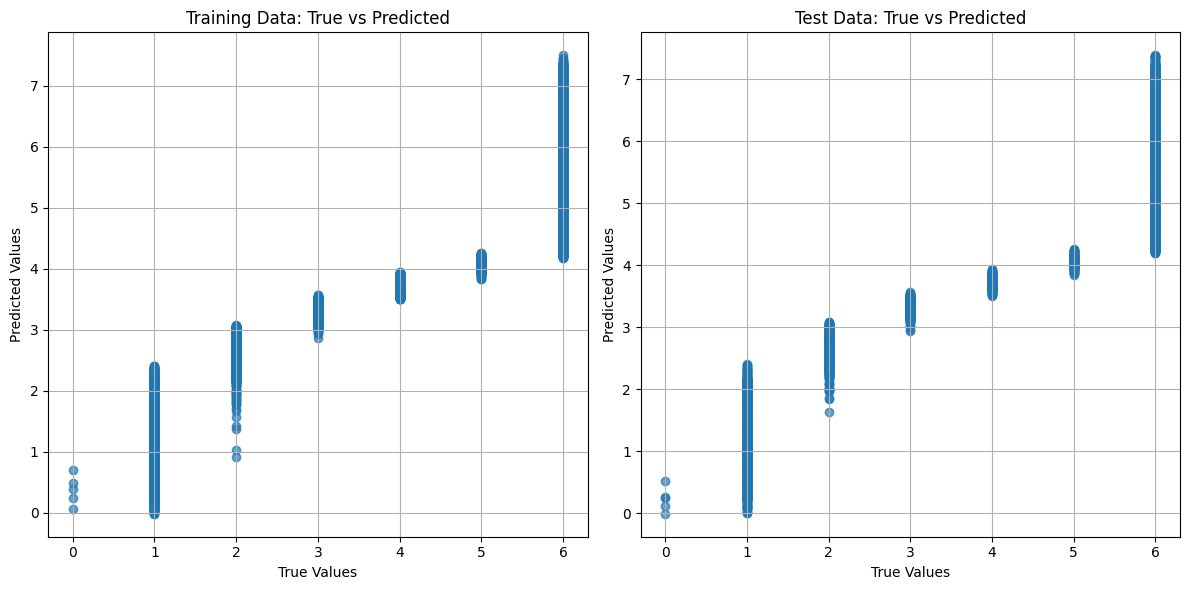

In [24]:
regr_model = sk.linear_model.LinearRegression()
regr_model.fit(X_train_std, Y_train)
train_predictions = regr_model.predict(X_train_std)
print(f"Train Rsquared: {Rsquared(Y_train, train_predictions)}")

test_predictions = regr_model.predict(X_test_std)
print(f"Test Rsquared: {Rsquared(Y_test, test_predictions)}")

scatter_plot_train_test(Y_train, Y_test, test_predictions, train_predictions)

## Lasso

Train Rsquared: 0.8770289323355103
Test Rsquared: 0.8745276112663962


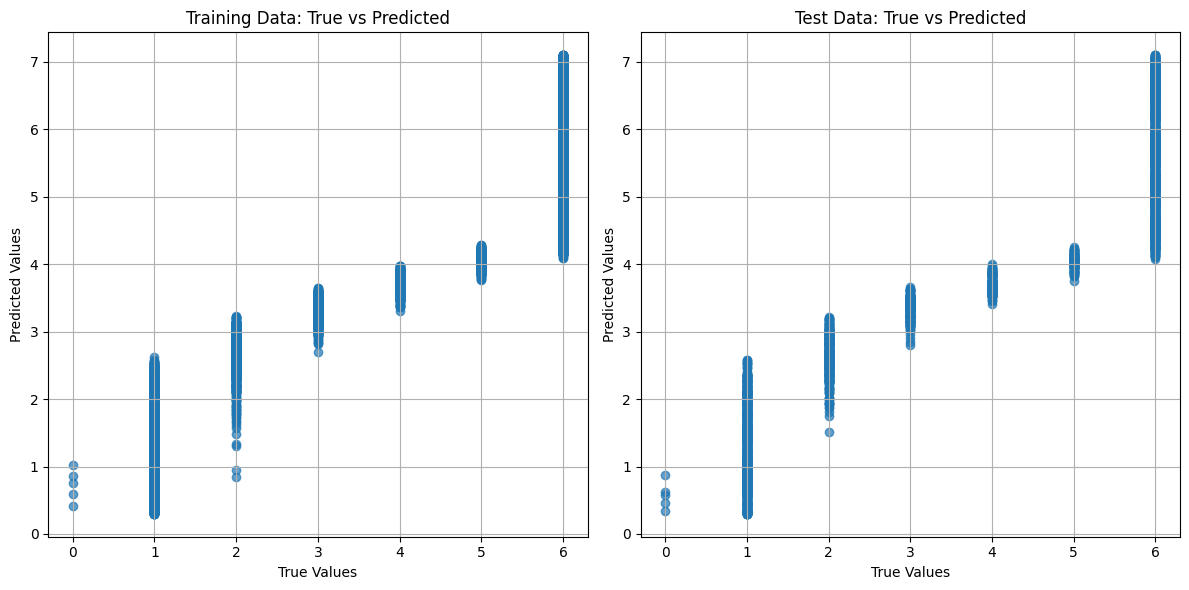

In [25]:
lasso = sk.linear_model.Lasso(alpha = 0.1)
model = lasso.fit(X_train_std, Y_train)

train_predictions = model.predict(X_train_std)
print(f"Train Rsquared: {Rsquared(Y_train, train_predictions)}")

test_predictions = model.predict(X_test_std)
print(f"Test Rsquared: {Rsquared(Y_test, test_predictions)}")

scatter_plot_train_test(Y_train, Y_test, test_predictions, train_predictions)

## Ridge

Train Rsquared: 0.8807563001822344
Test Rsquared: 0.8782342701600747


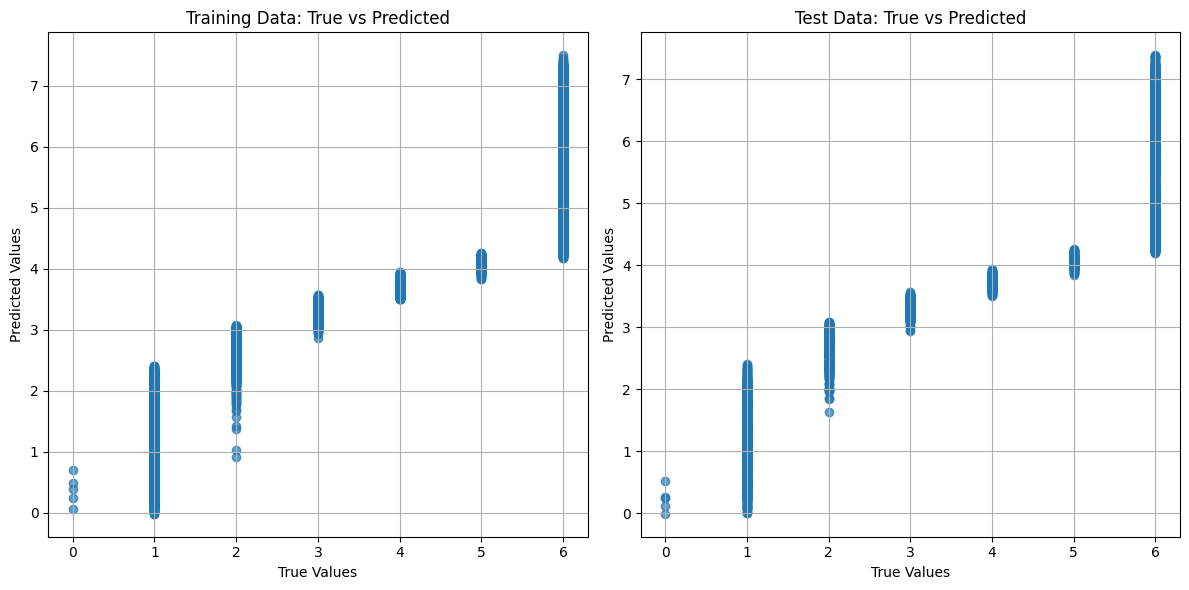

In [26]:
ridge = sk.linear_model.Ridge(alpha = 0.1)
model = ridge.fit(X_train_std, Y_train)

train_predictions = model.predict(X_train_std)
print(f"Train Rsquared: {Rsquared(Y_train, train_predictions)}")

test_predictions = model.predict(X_test_std)
print(f"Test Rsquared: {Rsquared(Y_test, test_predictions)}")

scatter_plot_train_test(Y_train, Y_test, test_predictions, train_predictions)

## Elastic Net

Train Rsquared: 0.8751980691169603
Test Rsquared: 0.8725282848442062


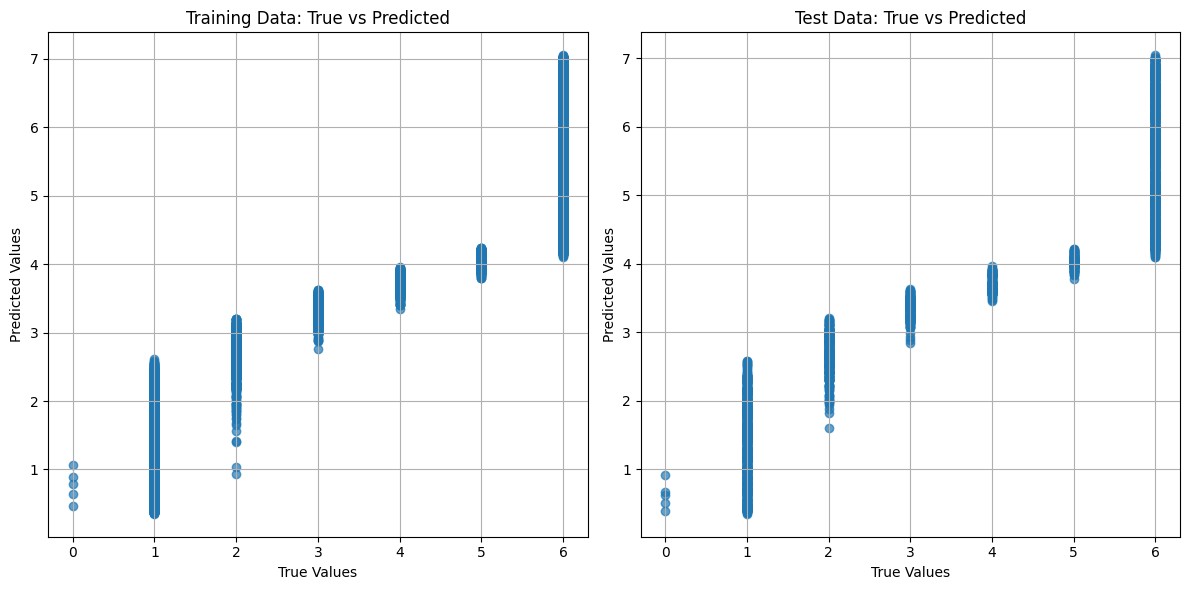

In [27]:
elastic = sk.linear_model.ElasticNet(alpha = 0.1)
model = elastic.fit(X_train_std, Y_train)

train_predictions = model.predict(X_train_std)
print(f"Train Rsquared: {Rsquared(Y_train, train_predictions)}")

test_predictions = model.predict(X_test_std)
print(f"Test Rsquared: {Rsquared(Y_test, test_predictions)}")

scatter_plot_train_test(Y_train, Y_test, test_predictions, train_predictions)

# Question 8

In [28]:

def create_model(degree):
    return sk.pipeline.make_pipeline(sk.preprocessing.PolynomialFeatures(degree), sk.linear_model.Ridge(alpha=0.1))

for i in range(1, 6):
    print("Degree:", i)

    model = create_model(i)
    model = model.fit(X_train_std, Y_train)
    train_predictions = model.predict(X_train_std)
    print(f"Train Rsquared: {Rsquared(Y_train, train_predictions)}")

    test_predictions = model.predict(X_test_std)
    print(f"Test Rsquared: {Rsquared(Y_test, test_predictions)}")

Degree: 1
Train Rsquared: 0.8807563001822344
Test Rsquared: 0.8782342701600747
Degree: 2
Train Rsquared: 0.8884527459186342
Test Rsquared: 0.888215575004082
Degree: 3
Train Rsquared: 0.96884037050175
Test Rsquared: 0.9669944822300977
Degree: 4
Train Rsquared: 0.9724396474818111
Test Rsquared: 0.9694302045160015
Degree: 5
Train Rsquared: 0.9872015452618143
Test Rsquared: 0.984561115816805
